In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### EDA

In [50]:
df = pd.read_csv('data/housing.csv')

In [51]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

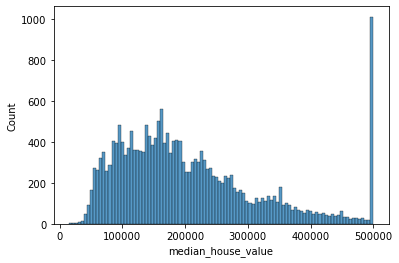

In [52]:
sns.histplot(df.median_house_value, bins=100)

It seems like it has tail, but not too long. And a lot of houses are sold for $500,000.

In [53]:
cols = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

In [54]:
df = df[cols]
df.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0


### Question 1

In [55]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Thefeature 'total_bedrooms' has 207 missing values

### Question 2

In [56]:
df.population.median()

1166.0

The median of 'population' is 1166

### Split the data

##### Shuffle the initial dataset, use seed 42

In [57]:
n = len(df)

In [58]:
idx = np.arange(n)

In [59]:
np.random.seed(42)
np.random.shuffle(idx)

In [64]:
df_sh = df.iloc[idx]
df_sh
# Shuffled the initial dataset with seed 42

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
11284,33.78,-117.96,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0
11964,34.02,-117.43,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0
5390,34.03,-118.38,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0


In [65]:
df_sh = df_sh.reset_index(drop=True)
df_sh

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
20635,33.78,-117.96,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0
20636,34.02,-117.43,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0
20637,34.03,-118.38,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0
20638,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0


##### Split your data in train/val/test sets, with 60%/20%/20% distribution

In [66]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val+n_test)
n, n_val, n_test, n_train

(20640, 4128, 4128, 12384)

In [110]:
df_train = df_sh.iloc[:n_train]
df_val = df_sh.iloc[n_train:n_train+n_val]
df_test = df_sh.iloc[n_train+n_val:]

In [111]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
12379,33.88,-117.81,19.0,2265.0,283.0,904.0,279.0,9.2327,461300.0
12380,35.48,-120.68,15.0,2608.0,525.0,1351.0,502.0,2.7798,205800.0
12381,38.98,-120.91,13.0,7689.0,1415.0,3264.0,1198.0,3.6530,146800.0
12382,34.09,-117.72,36.0,1473.0,328.0,785.0,299.0,3.2566,151800.0


In [112]:
y_train = df_train.median_house_value
y_val = df_val.median_house_value
y_test = df_test.median_house_value

In [113]:
y_train

0         47700.0
1         45800.0
2        500001.0
3        218600.0
4        278000.0
           ...   
12379    461300.0
12380    205800.0
12381    146800.0
12382    151800.0
12383    420300.0
Name: median_house_value, Length: 12384, dtype: float64

##### Make sure that the target value ('median_house_value') is not in your dataframe.

In [114]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [115]:
df_train.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801


##### Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [116]:
y_train

0         47700.0
1         45800.0
2        500001.0
3        218600.0
4        278000.0
           ...   
12379    461300.0
12380    205800.0
12381    146800.0
12382    151800.0
12383    420300.0
Name: median_house_value, Length: 12384, dtype: float64

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

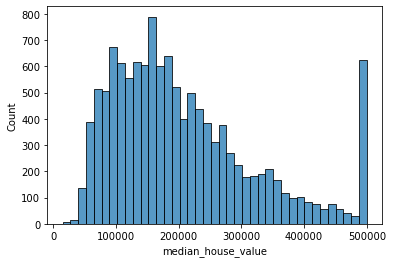

In [117]:
sns.histplot(y_train)

In [118]:
y_train = np.log1p(y_train)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

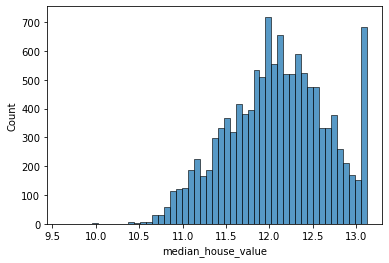

In [119]:
sns.histplot(y_train)

In [120]:
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [121]:
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

In [188]:
y_train

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

### Question 3

##### Fill NAN with 0

In [133]:
df_train_0 = df_train.copy()
df_train_0

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250
...,...,...,...,...,...,...,...,...
12379,33.88,-117.81,19.0,2265.0,283.0,904.0,279.0,9.2327
12380,35.48,-120.68,15.0,2608.0,525.0,1351.0,502.0,2.7798
12381,38.98,-120.91,13.0,7689.0,1415.0,3264.0,1198.0,3.6530
12382,34.09,-117.72,36.0,1473.0,328.0,785.0,299.0,3.2566


In [135]:
df_train_0['total_bedrooms'] = df_train_0['total_bedrooms'].fillna(0)

In [136]:
df_train_0.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.06,-119.01,25.0,1505.0,0.0,1392.0,359.0,1.6812
1,35.14,-119.46,30.0,2943.0,0.0,1565.0,584.0,2.5313
2,37.80,-122.44,52.0,3830.0,0.0,1310.0,963.0,3.4801


In [165]:
X_train = df_train_0.values

In [166]:
X_train

array([[ 3.6060e+01, -1.1901e+02,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [ 3.5140e+01, -1.1946e+02,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [ 3.7800e+01, -1.2244e+02,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [ 3.8980e+01, -1.2091e+02,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [ 3.4090e+01, -1.1772e+02,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [ 3.7760e+01, -1.2247e+02,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [139]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [167]:
w0, w = train_linear_regression(X_train, y_train)

In [168]:
w0

-11.686975241911805

In [169]:
w

array([-2.82087184e-01, -2.76255120e-01,  2.91329621e-03, -8.64531514e-06,
        1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01])

In [170]:
y_pred = w0 + X_train.dot(w)

In [171]:
y_pred

array([11.28055213, 11.90427911, 12.46507934, ..., 11.53259294,
       11.92377088, 12.54517195])

<AxesSubplot:ylabel='Count'>

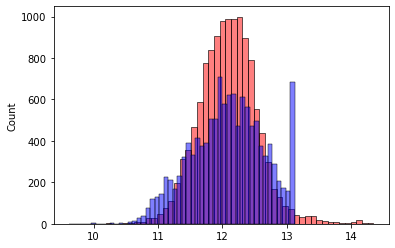

In [172]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [173]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [174]:
rmse(y_train, y_pred)

0.3413135910156676

In [175]:
X_val = df_val.values

In [176]:
y_pred = w0 + X_val.dot(w)

In [179]:
score_0 = rmse(y_val, y_pred)
score_0 = round(score_0, 2)
score_0

0.33

##### Fill NAN with mean

In [148]:
df_train_mean = df_train.copy()
df_train_mean

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250
...,...,...,...,...,...,...,...,...
12379,33.88,-117.81,19.0,2265.0,283.0,904.0,279.0,9.2327
12380,35.48,-120.68,15.0,2608.0,525.0,1351.0,502.0,2.7798
12381,38.98,-120.91,13.0,7689.0,1415.0,3264.0,1198.0,3.6530
12382,34.09,-117.72,36.0,1473.0,328.0,785.0,299.0,3.2566


In [152]:
mean = df_train_mean['total_bedrooms'].mean()
mean

533.4803317730147

In [153]:
df_train_mean['total_bedrooms'] = df_train_mean['total_bedrooms'].fillna(mean)

In [180]:
X_train = df_train_mean.values

In [181]:
w0, w = train_linear_regression(X_train, y_train)

In [182]:
y_pred = w0 + X_train.dot(w)
y_pred

array([11.37346084, 11.97238956, 12.49872828, ..., 11.53551178,
       11.92115877, 12.54500627])

<AxesSubplot:ylabel='Count'>

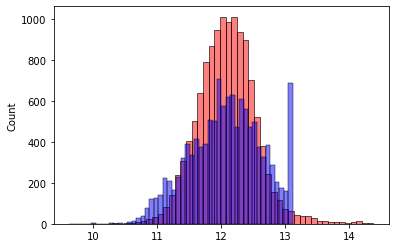

In [183]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [184]:
rmse(y_train, y_pred)

0.34104161810328065

In [185]:
X_val = df_val.values

In [186]:
y_pred = w0 + X_val.dot(w)

In [187]:
score_mean = rmse(y_val, y_pred)
score_mean = round(score_mean, 2)
score_mean

0.33

- RMSEs of both options are the same

### Question 4

In [189]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [190]:
X_train = df_train_0.values

In [192]:
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.3295319365989469

In [199]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2) 
    
    print(r, w0, score)

0 -11.686975241911805 0.33
1e-06 -11.686959176106466 0.33
0.0001 -11.685368865381463 0.33
0.001 -11.670931318209552 0.33
0.01 -11.528493585718884 0.33
0.1 -10.274500282155724 0.33
1 -4.920480897785023 0.33
5 -1.482095745620537 0.34
10 -0.7899311832204973 0.34


- r = 0 gives the best RMSE

### Question 5

In [225]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n = len(df)
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    df_sh = df.iloc[idx]
    df_sh = df_sh.reset_index(drop=True)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - (n_val+n_test)

    df_train = df_sh.iloc[:n_train]
    df_val = df_sh.iloc[n_train:n_train+n_val]
    df_test = df_sh.iloc[n_train+n_val:]

    y_train = df_train.median_house_value
    y_val = df_val.median_house_value
    y_test = df_test.median_house_value

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
    y_test = np.log1p(y_test)

    y_train = y_train.values
    y_val = y_val.values
    y_test = y_test.values

    df_train_0 = df_train.copy()
    df_train_0['total_bedrooms'] = df_train_0['total_bedrooms'].fillna(0)

    X_train = df_train_0.values
    X_val = df_val.values

    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    score_0 = rmse(y_val, y_pred)
    print(score_0, s)

nan 0
nan 1
nan 2
nan 3
nan 4
nan 5
nan 6
nan 7
nan 8
nan 9


In [255]:
n = len(df)
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_sh = df.iloc[idx]
df_sh = df_sh.reset_index(drop=True)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val+n_test)

df_train = df_sh.iloc[:n_train]
df_val = df_sh.iloc[n_train:n_train+n_val]
df_test = df_sh.iloc[n_train+n_val:]

y_train = df_train.median_house_value
y_val = df_val.median_house_value
y_test = df_test.median_house_value

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

y_train = y_train.values
y_val = y_val.values
y_test = y_test.values

df_train_0 = df_train.copy()
df_train_0['total_bedrooms'] = df_train_0['total_bedrooms'].fillna(0)

X_train = df_train_0.values
X_val = df_val.values

w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w0 + X_val.dot(w)
score_0 = rmse(y_val, y_pred)
print(score_0, 9)

nan 9


In [244]:
X_test = df_test.values

In [245]:
y_pred = w0 + X_test.dot(w)

In [247]:
score_0 = rmse(y_val, y_pred)
score_0

0.7464278142607114